This file aims to predict the direction of the closing prices (Positive/Negative return per day)

It exists solely to prove that stock prediction is difficult, therefore the model I have built previously is bound to be inaccurate.

In [169]:
# Import data
import yfinance as yf
stock_df = yf.download("SONY", start="2010-01-01", end="2025-06-30")
stock_df.tail()

/tmp/ipython-input-169-3955176817.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download("SONY", start="2010-01-01", end="2025-06-30")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SONY,SONY,SONY,SONY,SONY
Date,,,,,
2025-06-23,24.420000,24.450001,23.900000,24.00,8944600
2025-06-24,24.990000,25.030001,24.670000,24.74,6395700
2025-06-25,24.920000,25.040001,24.860001,25.01,3554900
2025-06-26,25.540001,25.610001,25.330000,25.35,5198000
2025-06-27,26.299999,26.440001,26.150000,26.34,6148000


In [170]:
# Check for any null data
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3895 entries, 2010-01-04 to 2025-06-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, SONY)   3895 non-null   float64
 1   (High, SONY)    3895 non-null   float64
 2   (Low, SONY)     3895 non-null   float64
 3   (Open, SONY)    3895 non-null   float64
 4   (Volume, SONY)  3895 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 182.6 KB


In [171]:
# Check statistics in the data
stock_df.describe()

Price,Close,High,Low,Open,Volume
Ticker,SONY,SONY,SONY,SONY,SONY
count,3895.000000,3895.000000,3895.000000,3895.000000,3.895000e+03
mean,10.428122,10.506225,10.347108,10.429037,6.829216e+06
std,6.620676,6.672117,6.570172,6.621956,6.722931e+06
min,1.875549,1.891130,1.863864,1.869706,9.410000e+05
25%,4.875872,4.914125,4.839382,4.892638,3.376000e+06
50%,7.881220,7.903036,7.851473,7.889154,4.981500e+06
75%,16.685743,16.806549,16.560921,16.708721,7.845250e+06
max,26.879999,26.950001,26.690001,26.950001,1.766625e+08


In [172]:
#Create the target column, a column of 0 and 1's depending on the closing price next day decreased or increased respectively.
stock_df["Return_Class"] = ((stock_df["Close"].shift(-1) - stock_df["Close"]) > 0).astype(int)
stock_df = stock_df.dropna()
stock_df

Price,Close,High,Low,Open,Volume,Return_Class
Ticker,SONY,SONY,SONY,SONY,SONY,
Date,,,,,,
2010-01-04,5.718958,5.749439,5.619896,5.623706,4944000,0
2010-01-05,5.692287,5.701813,5.619896,5.661807,2839000,0
2010-01-06,5.686572,5.705623,5.650376,5.692287,2341000,0
2010-01-07,5.677047,5.690383,5.637041,5.665617,3226500,1
2010-01-08,5.793255,5.804686,5.701813,5.722769,2870500,1
...,...,...,...,...,...,...
2025-06-23,24.420000,24.450001,23.900000,24.000000,8944600,1
2025-06-24,24.990000,25.030001,24.670000,24.740000,6395700,0


In [173]:
# Remove the Ticker level from the headers (To make it clearer)
stock_df.columns = stock_df.columns.get_level_values(0)


In [174]:
stock_df["SMA_10"]  = stock_df["Close"].rolling(10).mean()
stock_df["STD_10"]  = stock_df["Close"].rolling(10).std()

# MACD
# 12-day and 26-day EMAs
ema_fast = stock_df['Close'].ewm(span=12, adjust=False).mean()
ema_slow = stock_df['Close'].ewm(span=26, adjust=False).mean()
stock_df['MACD']        = ema_fast - ema_slow
# 9-day EMA of the MACD (signal line)
stock_df['MACD_Signal'] = stock_df['MACD'].ewm(span=9, adjust=False).mean()

# RSI
delta = stock_df['Close'].diff()
gain  = delta.clip(lower=0)
loss  = -delta.clip(upper=0)
# average gains/losses over 14 periods
avg_gain = gain.rolling(window=14, min_periods=14).mean()
avg_loss = loss.rolling(window=14, min_periods=14).mean()
rs       = avg_gain / avg_loss
stock_df['RSI'] = 100 - (100 / (1 + rs))

# drop the NaNs created by the indicators
stock_df.dropna(inplace=True)


stock_df = stock_df.dropna()
stock_df

Price,Close,High,Low,Open,Volume,Return_Class,SMA_10,STD_10,MACD,MACD_Signal,RSI
Date,,,,,,,,,,,
2010-01-25,6.629571,6.665767,6.562895,6.644812,4857000,0,6.343434,0.246886,0.219868,0.150728,80.484692
2010-01-26,6.381916,6.465739,6.353341,6.427638,6073500,0,6.398680,0.168443,0.210381,0.162658,70.111156
2010-01-27,6.332385,6.370486,6.221892,6.286664,7068500,1,6.430494,0.106373,0.196599,0.169447,68.364074
2010-01-28,6.439068,6.553371,6.391441,6.536225,5870000,0,6.442687,0.098644,0.192071,0.173971,70.533917
2010-01-29,6.330480,6.456213,6.326670,6.376201,4681500,1,6.433162,0.104866,0.177673,0.174712,64.536099
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-23,24.420000,24.450001,23.900000,24.000000,8944600,1,25.783000,0.690186,-0.041271,0.219871,24.691351
2025-06-24,24.990000,25.030001,24.670000,24.740000,6395700,0,25.623000,0.667400,-0.090617,0.157773,33.270663
2025-06-25,24.920000,25.040001,24.860001,25.010000,3554900,1,25.495000,0.667187,-0.133830,0.099453,33.459348


In [175]:
# Check for correlation of features with target
import pandas as pd
corr_matrix = stock_df.corr()
print(corr_matrix["Return_Class"].sort_values(ascending=False))

Price
Return_Class    1.000000
SMA_10          0.015819
Open            0.015702
High            0.015481
Low             0.015466
Close           0.015187
STD_10          0.006103
MACD_Signal     0.003809
RSI            -0.002728
MACD           -0.003629
Volume         -0.006964
Name: Return_Class, dtype: float64


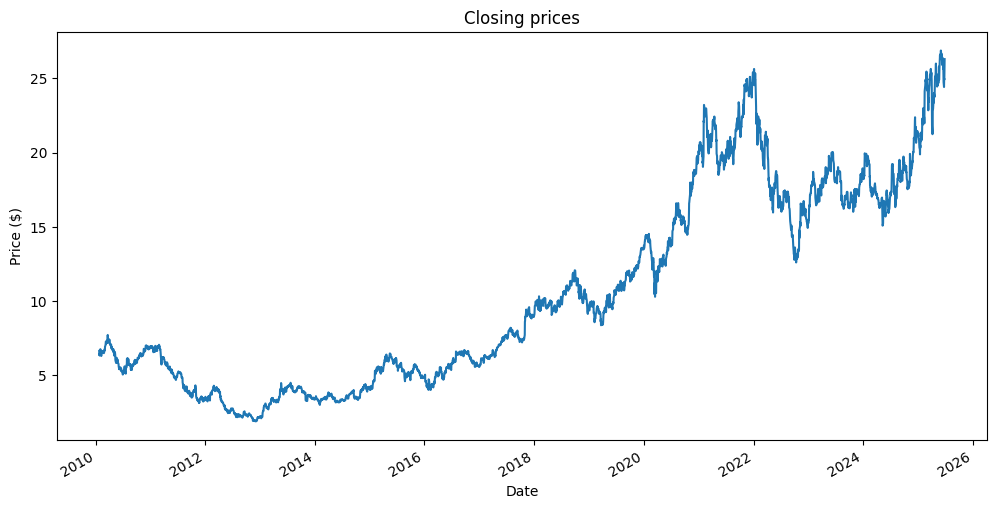

In [176]:
# Plot the true values of the closing times (for comparison later)
import matplotlib.pyplot as plt
stock_df["Close"].plot(figsize=(12,6), title="Closing prices")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.show()

In [177]:
batch_size=32

In [178]:
# Divide independent (target) and dependent variables
X = stock_df.drop("Return_Class", axis=1)
y = stock_df["Return_Class"]


In [179]:
# Split data into training and testing datasets, then scale the values.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=False)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


X_train, X_test = X_train_scaled, X_test_scaled




In [180]:
# Convert the NumPy arrays into torch tensors so that PyTorch can perform operations on them

import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Tensor shape is: [num_elements, num_featuers] But it has to be --> [batch_size, sequence_length, num_features].   (num_elements is essentially batch_size).
#sequence_length = Lookback days, num_features = Features per day

/tmp/ipython-input-180-3261172812.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
/tmp/ipython-input-180-3261172812.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [181]:
from torch.utils.data import Dataset

class StockDataset(Dataset):  # Create a custom dataset

  """
    Custom Dataset for time-series sequences.

    For each starting index:
      - X_seq = features from days t to t+seq_len-1
      - y_target = close price of day t+seq_len

    This setup means:
      - We predict the next day's close price (t+1) after our input window.
      - This is a single-step forecast.
  """

  def __init__(self, X, y, seq_len):
      self.X = X
      self.y = y
      self.seq_len = seq_len

  def __len__(self):
      return len(self.X) - self.seq_len

  def __getitem__(self, index):
      X_seq = self.X[index : index + self.seq_len]

      y_target = self.y[index + self.seq_len - 1] # Since target is shifted initially (Target_close = Close + 1), we must -1 here.
      return X_seq, y_target
      #return torch.tensor(X_seq, dtype=torch.float32), \ torch.tensor(y_target, dtype=torch.float32)

# This dataset converts the dataset from [num_elements, num_features] --> many overlapping windows of shape: [seq_length, num_features].

In [182]:
from torch.utils.data import DataLoader
train_dataset = StockDataset(X_train_tensor, y_train_tensor, seq_len=10)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # The overlapping windows are batched with batch size 16, making the shape: [16, seq_len, num_features]

In [183]:
for X_batch, y_batch in train_loader:
  print(X_batch.shape, y_batch.shape)
  break

torch.Size([32, 10, 10]) torch.Size([32])


In [184]:
import torch.nn as nn

class LSTMClassifier(nn.Module):  # For classification
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)           # [B, seq_len, H]
        last = out[:, -1, :]            # [B, H]
        logit = self.fc(last).squeeze(1)# [B]
        return logit                   # raw scores (logits)

Now, this input is feasible for LSTM to work.

In [185]:
X_train_tensor

tensor([[-0.3162, -0.3184, -0.3186,  ...,  0.9007,  0.6109,  1.6451],
        [-0.3595, -0.3531, -0.3556,  ...,  0.8564,  0.6701,  1.0529],
        [-0.3682, -0.3697, -0.3788,  ...,  0.7921,  0.7038,  0.9532],
        ...,
        [ 1.5613,  1.6122,  1.5816,  ..., -2.1701, -3.2503, -0.1223],
        [ 1.6185,  1.6295,  1.6143,  ..., -1.7968, -2.9834,  0.2156],
        [ 1.6614,  1.6562,  1.6266,  ..., -1.3940, -2.6842,  0.3327]])

In [186]:
X_train_tensor.shape, y_train_tensor.shape, X_test_tensor.shape, y_test_tensor.shape

(torch.Size([3104, 10]),
 torch.Size([3104]),
 torch.Size([777, 10]),
 torch.Size([777]))

In [187]:
# After optuna:
torch.manual_seed(42)

input_size=10

#model = LSTMModel(input_size=10, hidden_size=39, num_layers=1, dropout=0.07879432879892956)
model = LSTMClassifier(input_size=input_size, hidden_size=67, num_layers=1, dropout=0.277254549576855)



/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.277254549576855 and num_layers=1
  warnings.warn(


{'seq_len': 15, 'hidden_size': 67, 'num_layers': 1, 'dropout': 0.277254549576855, 'batch_size': 32, 'lr': 0.0005134192461557785}

In [189]:
test_dataset = StockDataset(X_test_tensor, y_test_tensor, seq_len=10)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

As we can see, the loss keeps decreasing and stops decreasing at around epoch 80.

In [190]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import copy

torch.manual_seed(42)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005134192461557785)
loss_fn   = nn.BCEWithLogitsLoss()

last_acc = None

# Hyperparameters
num_epochs      = 100
patience        = 20    # how many drops in a row to tolerate
drops_in_a_row  = 0
best_acc        = 0.0

for epoch in range(num_epochs):
    # train
    model.train()
    for Xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(Xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        optimizer.step()

    # eval
    model.eval()
    all_preds, all_labels = [], []
    with torch.inference_mode():
        for Xb, yb in test_loader:
            logits = model(Xb)
            probs  = torch.sigmoid(logits)
            preds  = (probs > 0.5).long()
            all_preds.extend(preds.tolist())
            all_labels.extend(yb.long().tolist())

    acc = accuracy_score(all_labels, all_preds)
    print(f"Epoch {epoch:02d} — Val Acc: {acc:.4f}")

    if acc > best_acc:
        best_acc   = acc
        no_improve = 0
        best_weights = copy.deepcopy(model.state_dict())  # Save the best model parameters into memory
    else:
        no_improve += 1
        print(f"  ↳ no improvement for {no_improve}/{patience} epochs")
    if no_improve >= patience:
        print(f"Stopping early: no better acc after {patience} epochs.")
        break

model.load_state_dict(best_weights) # Load the best model parameters from memory
print(f"Best validation accuracy: {best_acc:.4f}")


Epoch 00 — Val Acc: 0.5111
Epoch 01 — Val Acc: 0.5124
Epoch 02 — Val Acc: 0.5059
  ↳ no improvement for 1/20 epochs
Epoch 03 — Val Acc: 0.5046
  ↳ no improvement for 2/20 epochs
Epoch 04 — Val Acc: 0.5020
  ↳ no improvement for 3/20 epochs
Epoch 05 — Val Acc: 0.5033
  ↳ no improvement for 4/20 epochs
Epoch 06 — Val Acc: 0.5124
  ↳ no improvement for 5/20 epochs
Epoch 07 — Val Acc: 0.4915
  ↳ no improvement for 6/20 epochs
Epoch 08 — Val Acc: 0.5007
  ↳ no improvement for 7/20 epochs
Epoch 09 — Val Acc: 0.5085
  ↳ no improvement for 8/20 epochs
Epoch 10 — Val Acc: 0.5046
  ↳ no improvement for 9/20 epochs
Epoch 11 — Val Acc: 0.4928
  ↳ no improvement for 10/20 epochs
Epoch 12 — Val Acc: 0.5020
  ↳ no improvement for 11/20 epochs
Epoch 13 — Val Acc: 0.4980
  ↳ no improvement for 12/20 epochs
Epoch 14 — Val Acc: 0.5046
  ↳ no improvement for 13/20 epochs
Epoch 15 — Val Acc: 0.5007
  ↳ no improvement for 14/20 epochs
Epoch 16 — Val Acc: 0.5072
  ↳ no improvement for 15/20 epochs
Epoch 17 —

TN=140  FP=239  FN=117  TP=271


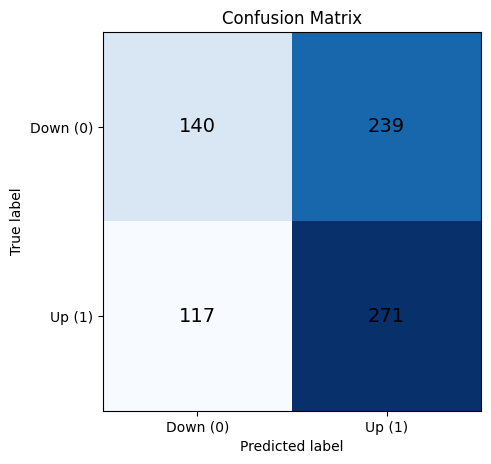

In [192]:
# Create a confusion matrix to visualize the results

import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 1. Run model on test set and collect preds + labels
model.eval()
all_labels = []
all_preds  = []

with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.float()               # ensure float32 and correct device
        logits = model(Xb)                       # raw scores [B] or [B,1]
        probs  = torch.sigmoid(logits).squeeze() # if shape [B,1] → [B]
        preds  = (probs > 0.5).long().tolist()
        labels = yb.long().tolist()
        all_preds.extend(preds)
        all_labels.extend(labels)

# 2. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
tn, fp, fn, tp = cm.ravel()

print(f"TN={tn}  FP={fp}  FN={fn}  TP={tp}")

# 3. Plot it
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Down (0)", "Up (1)"])
ax.set_yticklabels(["Down (0)", "Up (1)"])

# annotate counts
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha="center", va="center", fontsize=14, color="black" if cm[i,j]>cm.max()/2 else "black")

plt.tight_layout()
plt.show()

In [193]:
from sklearn.metrics import accuracy_score

# all_labels and all_preds are your lists of true and predicted 0/1 values:
acc = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {acc:.2%}")   # prints e.g. "Accuracy: 72.50%"

Accuracy: 53.59%


In [194]:
from collections import Counter
majority = Counter(all_labels).most_common(1)[0][0]
majority_acc = sum(1 for y in all_labels if y==majority) / len(all_labels)
print(f"Majority class baseline: {majority_acc:.2%}")

Majority class baseline: 50.59%


Overall for most cases the accuracy is slightly above or very close to the naive baseline, which is pretty much a 50% guess. It proves that stock price prediction is very difficult, as the data is very noisy and unpredictable.

In [195]:
#!pip install optuna

In [196]:
"""import optuna
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

# make sure these are defined elsewhere in your script:
# StockDataset, LSTMClassifier, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor


def objective(trial):
    # 1) suggest hyperparams
    seq_len     = trial.suggest_int("seq_len", 5, 30)
    hidden_size = trial.suggest_int("hidden_size", 16, 128)
    num_layers  = trial.suggest_int("num_layers", 1, 3)
    dropout     = trial.suggest_float("dropout", 0.0, 0.5)
    batch_size  = trial.suggest_categorical("batch_size", [16, 32, 64])
    lr          = trial.suggest_loguniform("lr", 1e-4, 1e-2)

    # 2) prepare data loaders
    train_ds = StockDataset(X_train_tensor, y_train_tensor, seq_len)
    val_ds   = StockDataset(X_test_tensor,  y_test_tensor,  seq_len)
    train_ld = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_ld   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)

    # 3) build model + optimizer + loss
    model     = LSTMClassifier(
        input_size=X_train_tensor.shape[1],
        hidden_size=hidden_size,
        num_layers=num_layers,
        dropout=dropout
    )
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn   = nn.BCEWithLogitsLoss()

    # 4) quick training loop
    for _ in range(10):
        model.train()
        for Xb, yb in train_ld:
            Xb, yb = Xb.float(), yb.float()
            optimizer.zero_grad()
            logits = model(Xb).squeeze()
            loss   = loss_fn(logits, yb)
            loss.backward()
            optimizer.step()

    # 5) validation
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for Xb, yb in val_ld:
            Xb = Xb.float()
            logits = model(Xb).squeeze()
            preds  = (torch.sigmoid(logits) > 0.5).long().tolist()
            labels = yb.long().tolist()
            all_preds.extend(preds)
            all_labels.extend(labels)

    acc = accuracy_score(all_labels, all_preds)
    print(
        f"Trial {trial.number:3d} → acc: {acc:.4f} | "
        f"hs={hidden_size}, nl={num_layers}, dr={dropout:.2f}, "
        f"lr={lr:.1e}, bs={batch_size}, seq={seq_len}"
    )

    return accuracy_score(all_labels, all_preds)

# 6) run Optuna
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)

    print("Best validation accuracy:", study.best_value)
    print("Best hyperparameters:", study.best_params)"""

'import optuna\nimport torch\nimport torch.nn as nn\nfrom torch.utils.data import DataLoader\nfrom sklearn.metrics import accuracy_score\n\n# make sure these are defined elsewhere in your script:\n# StockDataset, LSTMClassifier, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor\n\n\ndef objective(trial):\n    # 1) suggest hyperparams\n    seq_len     = trial.suggest_int("seq_len", 5, 30)\n    hidden_size = trial.suggest_int("hidden_size", 16, 128)\n    num_layers  = trial.suggest_int("num_layers", 1, 3)\n    dropout     = trial.suggest_float("dropout", 0.0, 0.5)\n    batch_size  = trial.suggest_categorical("batch_size", [16, 32, 64])\n    lr          = trial.suggest_loguniform("lr", 1e-4, 1e-2)\n\n    # 2) prepare data loaders\n    train_ds = StockDataset(X_train_tensor, y_train_tensor, seq_len)\n    val_ds   = StockDataset(X_test_tensor,  y_test_tensor,  seq_len)\n    train_ld = DataLoader(train_ds, batch_size=batch_size, shuffle=True)\n    val_ld   = DataLoader(val_ds,   b